# 线性回归
线性回归的目标就是找到一个函数来<u>  拟合数据  </u>，让预测值尽可能的接近我们的<u>  真实值  </u>。



例如：
    用一条直线来尽量准确地“描绘”一堆散落的数据点



# 参数估计：确定这个函数的参数的过程。常用最小二乘法

例如：
    参数估计的过程，就是要找到最合适的 a 和 b，使得这条直线能够最好地贴合那些数据点。简单来说，就是在找这条直线的“最佳位置”和“最佳角度”。

##  一些基本概念

> eta -> η, theta -> θ， sigm -> σ，epsilon -> ε
> 
> 简单线性回归模型的表达式为：y = β0 + β1x + ϵ，其中y是因变量，x是⾃变量，β0是截距，β1是斜率，ϵ是误差项（服从均值为 0 的正态分布）。

**自变量**：影响因变量的变量,在模型中用于预测和解释因变量。

**因变量**：是受到一个或者多个自变量影响的变量，也称为**响应变量**、**被解释变量**

**截距**：是线性回归中的常数项，反映了除了自变量之外其他因素对因变量的综合影响（当x = 0时）。在机器学习领域也称为**偏差（bias）**

**斜率**：表示直线的倾斜程度。反映了自变量变动一个单位，因变量的平均变动量。在机器学习和优化算法中，为了更简洁通用地表示这些参数，常常用θ（theta）统一表示模型的参数向量。

## 计算推导
#### 简单线性回归的参数估计
#### 多元线性回归的参数估计
……

# 逻辑回归

逻辑回归就是将线性回归模型映射到概率的模型。把实数空间的输出[−∞,+∞]映射到取值为[0,1]的区间, 从⽽把模型的输出值转换为概率值。

我们使用sigmoid函数进行转换：

> p^ = sigmoid(z) = 1+1e−z

```python
def sigmoid(z):
    return 1/(1 + np.exp(-z))
```




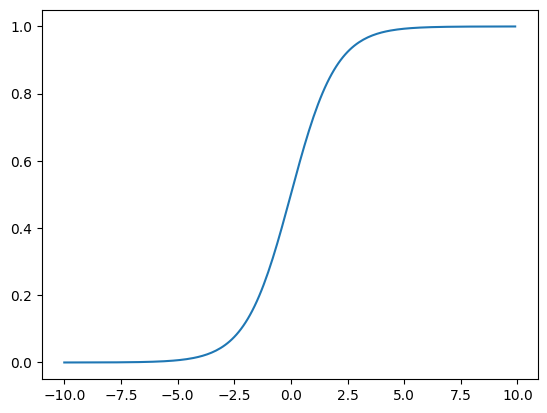

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(z):
    """
    计算Sigmoid函数值。

    Sigmoid函数是一种常用的激活函数，其公式为：
    f(z) = 1 / (1 + ethetap(-z))

    参数:
    z (float or array_like): 输入值，可以是标量或数组。

    返回:
    float or array_like: Sigmoid函数的输出值，与输入值的形状相同。
    """
    return 1/(1 + np.exp(-z))

# 生成从-10到10，步长为0.1的数组
theta = np.arange(-10, 10, 0.1)
# 计算sigmoid函数的值
y = sigmoid(theta)
# 绘制theta和y的图像
plt.plot(theta, y) # 值域（0，1）



# 最⼤似然估计和损失函数

正态分布的**概率密度函数**：

……μ是均值,σ是标准差。



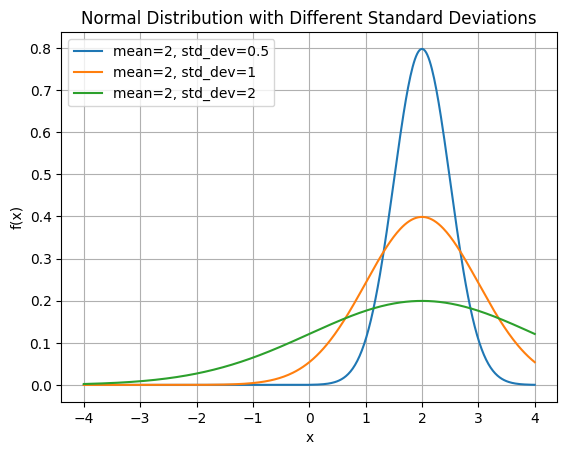

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 生成x值
x = np.linspace(-4, 4, 400)

# 定义标准差
std_devs = [0.5, 1, 2]
# 定义均值
mean = 2

# 绘制不同标准差的正态分布函数图像
for std_dev in std_devs:
    y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    plt.plot(x, y, label=f'mean={mean}, std_dev={std_dev}')

# 添加图例和标签
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Normal Distribution with Different Standard Deviations')
plt.grid(True)

# 显示图像
plt.show()


# 损失函数


In [3]:
def loss_function(y, y_hat):
    e = 1e-8 # 防⽌y_hat计算值为0，添加的极⼩值epsilon 10的-8次方
    return - y * np.log(y_hat + e) - (1 - y) * np.log(1 - y_hat + e)

# 梯度下降法

梯度下降是⼀种基于搜索的最优化的⽅法，它的⽬标是⽤于优化⼀
个⽬标函数。

在机器学习中，梯度下降法的作⽤就是：**最⼩化⼀个损失函数。**

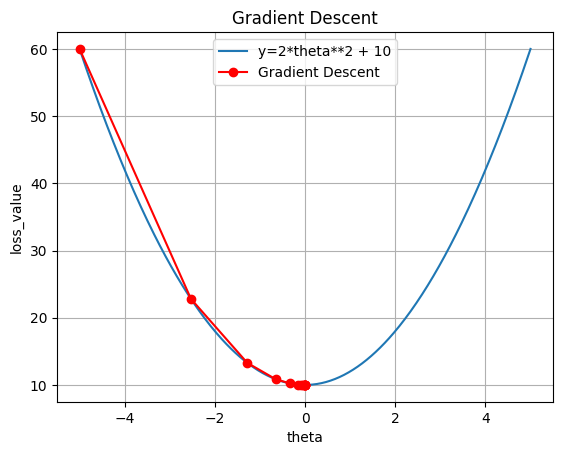

step = 14
theta =  [-5.00000000e+00 -2.53088000e+00 -1.28107071e+00 -6.48447250e-01
 -3.28228435e-01 -1.66141356e-01 -8.40967673e-02 -4.25677653e-02
 -2.15467811e-02 -1.09064635e-02 -5.52059007e-03 -2.79439020e-03
 -1.41445325e-03 -7.15962290e-04]
loss_function(theta) =  [60.         22.81070715 13.28228435 10.84096767 10.21546781 10.0552059
 10.01414453 10.00362403 10.00092853 10.0002379  10.00006095 10.00001562
 10.000004   10.00000103]
loss(theta)-loss(last_theta) =  -2.9761520075055614e-06


In [4]:
import numpy as np
import matplotlib.pyplot as plt
# 定义函数f，参数为theta
def loss_function(theta):
    # 返回2*theta的平方加1
    return 2*theta**2 + 10
# 定义梯度函数
def grad(theta):
    return 2*2*theta
# 创建输入数据
theta = np.linspace(-5,5,400)
y = loss_function(theta=theta)
# 绘制loss_function图像
plt.plot(theta, y, label = 'y=2*theta**2 + 10')
plt.xlabel('theta')
plt.ylabel('loss_value')
'''
梯度下降
eta -> η, theta -> θ， sigm -> σ，epsilon -> ε
'''
learning_rate = 0.123456 # 可以设置不同的值观察图像，例如：0.1，0.01，1
# 初始参数值
theta0 = -5
theta = np.array([theta0])
# 下降次数
echo = 100
# 精度要求
epsilon = 1e-5
# 进行梯度下降
# 理论上theta的取值使得loss_value取0为最佳，但是theta很难刚好满足这个情况。
# 所以我们可以设置一个最小值epsilon来界定我们需要loss_value达到的最大值目标
# 当theta与更新后的theta的差值小于epsilon就终止运算
i = 0
while i != 100:
    grad_theta = theta[-1]
    theta = np.append(theta,grad_theta - learning_rate * grad(theta=grad_theta))
    if (abs(loss_function(theta=theta[-1])-loss_function(theta=grad_theta))) < epsilon:
        break
    i += 1
plt.plot(theta, loss_function(theta), 'ro-', label='Gradient Descent')
# 添加图例和标签
plt.legend()
plt.title('Gradient Descent')
plt.grid(True)

# 显示图像
plt.show()
print('step =', len(theta))
print('theta = ', theta)
print('loss_function(theta) = ',loss_function(theta))
print('loss(theta)-loss(last_theta) = ',loss_function(theta=theta[-1])-loss_function(theta=grad_theta))


Actual echo =  24
theta[-1]: -3.948651115268011e-05
loss_min = loss_function(theta[-1]): 10.00000000311837
bias =  5.543766334881184e-09


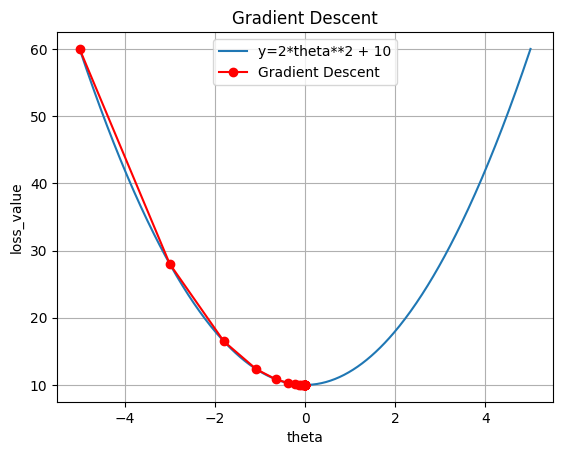

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数f，参数为theta
def loss_function(theta):
    # 返回2*theta的平方加1
    return 2*theta**2 + 10
# 定义梯度函数
def grad(theta):
    return 2*2*theta

# 创建输入数据
theta = np.linspace(-5,5,400)
y = loss_function(theta=theta)
# 绘制loss_function图像
plt.plot(theta, y, label = 'y=2*theta**2 + 10')
plt.xlabel('theta')
plt.ylabel('loss_value')


def gradient_descent(learning_rate = 0.1, theta0 = -5, echo = 100, epsilon = 1e-8)-> np.array:
    '''梯度下降'''
    # 初始参数值
    theta = np.array([theta0])
    # 进行梯度下降
    # 理论上theta的取值使得loss_value取0为最佳，但是theta很难刚好满足这个情况。
    # 所以我们可以设置一个最小值epsilon来界定我们需要loss_value达到的最大值目标
    # 当theta与更新后的theta的差值小于epsilon就终止运算
    i = 0
    while i < echo:
        grad_theta = theta[-1]

        theta = np.append(theta,grad_theta - learning_rate * grad(theta=grad_theta))

        if (abs(loss_function(theta=theta[-1])-loss_function(theta=grad_theta))) < epsilon:
            print('Actual echo = ', len(theta))
            print('theta[-1]:',theta[-1])
            print('loss_min = loss_function(theta[-1]):',loss_function(theta[-1]))
            print('bias = ',abs(loss_function(theta=theta[-1])-loss_function(theta=grad_theta)))
            break

        i +=1
    return theta 

def plot_theta_history(theta):
    plt.plot(theta, loss_function(theta), 'ro-', label='Gradient Descent')
    # 添加图例和标签
    plt.legend()
    plt.title('Gradient Descent')
    plt.grid(True)

    # 显示图像
    plt.show()

theta = gradient_descent()
plot_theta_history(theta)

# 课件上的代码


In [6]:
# 计算导数
def derivate(theta):
    return 2 * (theta - 2.5)

# 计算损失函数
def loss(theta):
    return (theta - 2.5)**2 - 1

In [7]:
theta = 0.0         # 参数初始值
learning_rate = 0.1 # 学习率 学习率大于1会报错，为什么
epsilon = 1e-8      # 精度

In [8]:
# 记录theta
theta_history = []

# 无限循环
while True:
    # 计算梯度
    gradient = derivate(theta=theta)

    # 记录上一次Thera的值
    last_theta = theta

    # 更新theta
    theta = theta - learning_rate * gradient
    print('theta',theta)
    # 
    theta_history.append(theta)

    # 计算损失函数值
    loss_v = loss(theta=theta)

    # 如果损失函数值为0，则跳出循环
    if abs(loss_v - loss(last_theta)) < 1e-8:
        break

theta 0.5
theta 0.9
theta 1.2200000000000002
theta 1.4760000000000002
theta 1.6808
theta 1.84464
theta 1.9757120000000001
theta 2.0805696
theta 2.16445568
theta 2.2315645440000003
theta 2.2852516352000003
theta 2.32820130816
theta 2.362561046528
theta 2.3900488372224
theta 2.41203906977792
theta 2.429631255822336
theta 2.4437050046578688
theta 2.454964003726295
theta 2.4639712029810363
theta 2.471176962384829
theta 2.476941569907863
theta 2.4815532559262907
theta 2.4852426047410328
theta 2.488194083792826
theta 2.490555267034261
theta 2.492444213627409
theta 2.493955370901927
theta 2.4951642967215415
theta 2.496131437377233
theta 2.4969051499017865
theta 2.497524119921429
theta 2.4980192959371434
theta 2.4984154367497147
theta 2.4987323493997717
theta 2.498985879519817
theta 2.4991887036158538
theta 2.499350962892683
theta 2.4994807703141464
theta 2.499584616251317
theta 2.4996676930010535
theta 2.499734154400843
theta 2.4997873235206742
theta 2.4998298588165393
theta 2.499863887053231

In [9]:
print(theta)
print(loss(theta=theta))

2.499891109642585
-0.99999998814289


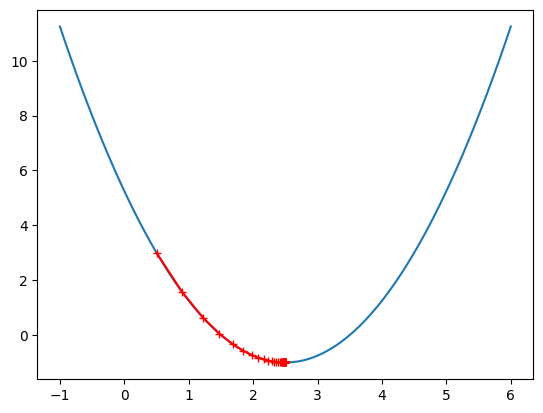

In [10]:
x = np.linspace(-1, 6, 150)
y = loss(x)
plt.plot(x, y, label='f(x) = (x - 2.5)**2 - 1')
plt.plot(theta_history, loss(np.array(theta_history)), color = 'r', marker = '+')
plt.show()

In [11]:
# 训练次数
train_times = len(theta_history)
print('train_times is', train_times)

train_times is 45


# 逻辑回归的梯度更新


In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np


X, y = make_classification(n_samples=150, n_features=10)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)
print(f'X.shape = {X.shape} \n\
y.shape = {y.shape}')
print(y,type(y))

theta = np.random.randn(1,10)
bias = 0
epochs = 3000
lr = 0.1
print(theta,len(theta))
print(X.shape[-1])
print(X_train.shape[-1])

def forward(theta, bias, X):
    '''定义前向传播函数'''
    # 计算z值，z为theta和X的点积加上bias
    z = np.dot(theta, X.T) + bias
    # 计算y_hat值，y_hat为1/(1 + e^(-z))
    y_hat = 1/(1 + np.exp(-z))
    # 返回y_hat值
    return y_hat

def loss(y, y_hat, ):  # 定义一个名为losss的函数，参数为y和y_hat
    '''定义逻辑回归的损失函数'''
    e = 1e-8  # 定义一个很小的数e，用于防止log函数中出现0
    return -y*np.log(y_hat + e) + (1 - y) * np.log(1 - y_hat + e)  # 返回交叉熵损失函数的值


def calc_gradient(y_hat, y, X ,m):
    '''定义梯度函数'''
    # 计算theta的梯度
    delta_theta = np.dot(y_hat - y, X)/m
    # 计算bias的梯度
    delta_bias = np.mean(y_hat - y)
    # 返回theta和bias的梯度
    return delta_theta, delta_bias

for i in range(epochs):

    y_hat = forward(theta=theta, bias=bias, X=X_train)

    loss_value = loss(y=y_train, y_hat=y_hat)

    delta_theta, delta_bias = calc_gradient(X=X_train , y= y_train, y_hat=y_hat, m=X_train.shape[-1])

    theta = theta - lr * delta_theta

    bias = bias - lr * delta_bias

    if i % 100 ==0 :

        accuracy = np.mean(np.round(y_hat) == y_train)

        # print(f'epochs = {i}, accuracy = {accuracy}, loss_val = {np.mean(loss_value)}')
        print(f"epoch: {i}, loss: {np.mean(loss_value)}, acc: {accuracy}, y_hat: {y_hat[:,3:6]},np.round(y_hat):{np.round(y_hat[:,3:6])}")


X.shape = (150, 10) 
y.shape = (150,)
[1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1
 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1
 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 1 1] <class 'numpy.ndarray'>
[[-1.17657994 -0.60196552 -0.11818891  0.26765692 -0.21393781 -1.43489928
  -0.21344862  1.62205309 -0.78762359  0.10231861]] 1
10
10
epoch: 0, loss: -0.12075096850013162, acc: 0.4, y_hat: [[0.16700255 0.35740904 0.82253949]],np.round(y_hat):[[0. 0. 1.]]
epoch: 100, loss: -0.06861798652363861, acc: 0.9904761904761905, y_hat: [[3.01603496e-02 9.94366788e-01 8.17064718e-04]],np.round(y_hat):[[0. 1. 0.]]
epoch: 200, loss: -0.06552111818137597, acc: 0.9904761904761905, y_hat: [[2.14862395e-02 9.95750305e-01 5.21637700e-04]],np.round(y_hat):[[0. 1. 0.]]
epoch: 300, loss: -0.0625315482584607, acc: 0.9904761904761905, y_hat: [[1.75

# 总结

由**线性回归**引入**逻辑回归**

**逻辑回归**就是将线性回归模型映射为概率的模型。

**概率**和**似然**的区别：前者由概率分布参数预测观测值的结果，后者已知某些观测值所得到的结果，对观测结果所属的概率分布参数进行估计。

**最⼤似然估计**：是一种技术，用来生成 拟合数据 任何分布的参数的最可能估计。简单来讲就是找到一个最符合当前观测数据的概率分布。

**似然函数**：对于一组观测到的数据$X$，假设其属于某个分布，得到概率密度函数，把$X$代入概率密度函数，得到每个数据点$x$在假设的概率分布中出现的可能性。$P(x1 ∣ μ, σ), P(x2 ∣ μ, σ), ... , P(xN ∣ μ, σ)$那么这组数据$X$在假设的概率分布中的出现的可能性就是它们所有概率的乘积:$L(μ, σ ∣ X) = P(X ∣ μ, σ) = ∏i
N=1 P(xi ∣ μ, σ)$,L(μ, σ ∣ X)就是似然函数, 利⽤已知观测值X, 来估计参数μ, σ的可能性.所以说，似然函数也是⼀种条件概率函数。

对数似然函数：对似然函数取 对数, 就是对数似然函数(log（似然函数）),对数似然函数是在神经⽹络优化中 最常⽤的**损失函数**

<div class="alert alert-success">
<b>为什么取对数：</b>
<ol>
原始的似然函数是很多条件概率的乘积, 在计算极⼤值的时候需要求似然函数的导数。⽽乘积的导数计算很麻烦, 所以取对数可以把乘法变成加法。
</ol>
</div>

**损失函数**:

假设函数：本质上是⼀个模型，⽤于描述⾃变量和、因变量之间的映射关系。

伯努利分布（Bernoulli distribution）是⼀个离散型概率分布，⽤
于描述只有两种可能结果的随机试验，例如抛硬币（正⾯或反
⾯）、产品是否合格（合格或不合格）等。

## 梯度下降方法

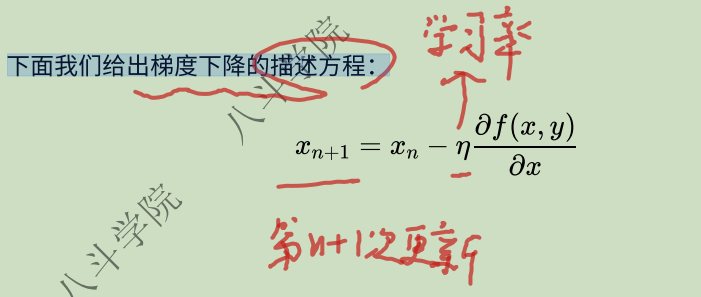


**超参数（Hyperparameters）**是指那些在训练过程开始之前就需要⼿动设置的参数，它们不能通过模型从数据中学习得到，⽽是需要通过⼈为的经验、实验或者特定的搜索⽅法来进⾏选择和调整。

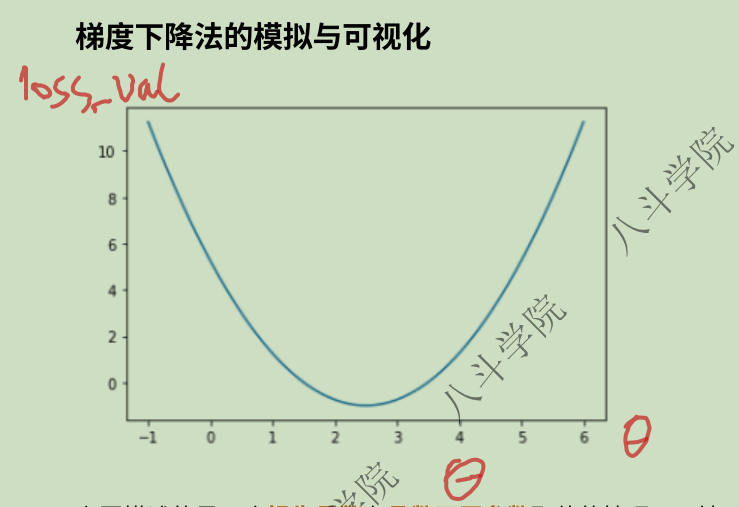


